In [337]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

In [338]:
# Read data from files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# List of 2 data frames
combine = [train_df, test_df]

In [339]:
# Check all the features
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [340]:
# preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [341]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [342]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null


## Incomplete data
train set : Cabin>Age>Embarked

test set: Cabin>Age>Fare

# Text attributes
Categorical - Sex, Embarked 

Alphanumeric - Ticket 

Text - Name

In [343]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [344]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Attalah, Mr. Sleiman",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [345]:
train_df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [346]:
train_df[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [347]:
train_df[['SibSp','Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [348]:
train_df[['Parch','Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


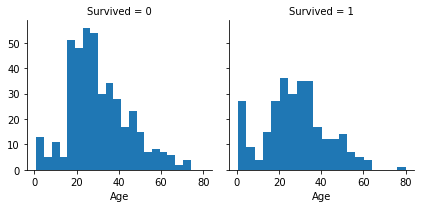

In [349]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

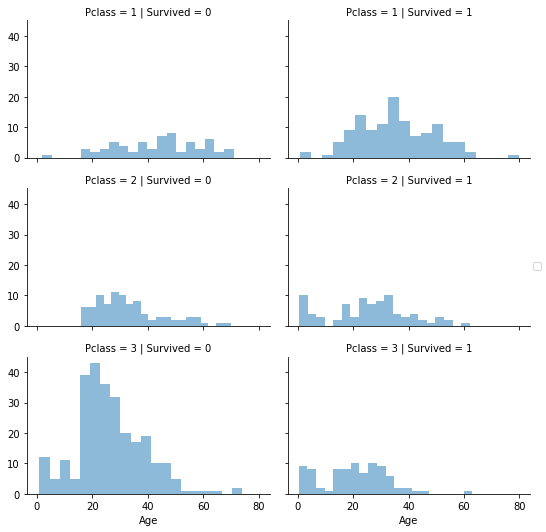

In [350]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.5, aspect=1.5)
g.map(plt.hist, 'Age', bins=20, alpha=0.5)
g.add_legend()

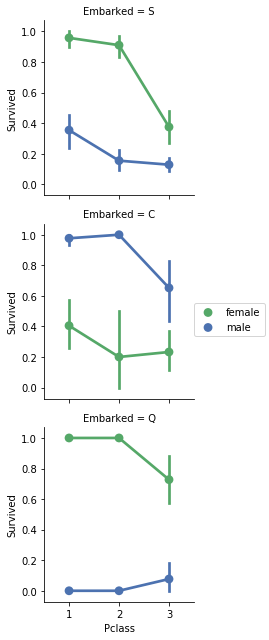

In [351]:
g = sns.FacetGrid(train_df, row='Embarked')
g.map(sns.pointplot, 'Pclass','Survived','Sex', palette='deep')
g.add_legend()

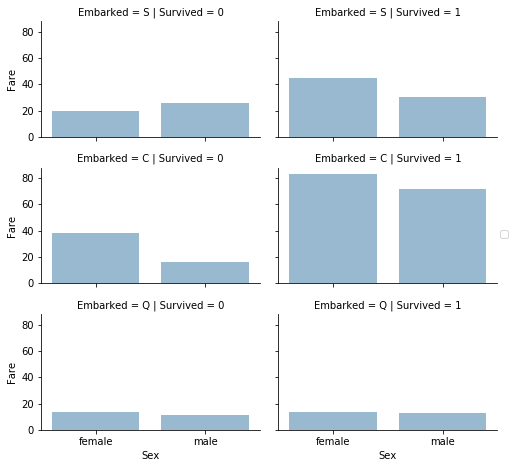

In [352]:
g = sns.FacetGrid(train_df, col='Survived', row='Embarked', size=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=False)
g.add_legend()

# Wrangle Data

## Drop features(columns)

In [353]:
# Drop Cabin as it has many missing values
# Drop Ticket as it has many duplicates

print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Cabin','Ticket'],axis=1)
test_df = test_df.drop(['Cabin','Ticket'],axis=1)
combine = [train_df, test_df]

print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


## Feature engineering - Title

In [354]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [355]:
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [356]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [357]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Ms            1
Jonkheer      1
Capt          1
Don           1
Sir           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [358]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].replace(['Dona','Don', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt', 
                                                 'Countess','Jonkheer'],'Rare')

In [359]:
train_df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [360]:
train_df[['Title','Survived']].groupby('Title', as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [361]:
test_df['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [362]:
# Convert Title to numerical field

title_mapping = {'Mrs':1, 'Miss':2, 'Master':3, 'Rare':4, 'Mr':5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [363]:
test_df[test_df['Title'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [364]:
train_df[train_df['Title'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [365]:
test_df['Title'].value_counts()

5    240
2     79
1     72
3     21
4      6
Name: Title, dtype: int64

In [366]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5


## Drop Name and PassengerId

In [367]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df,test_df]

print(train_df.shape, test_df.shape)

(891, 9) (418, 9)


## Convert categorical features into numerical ones

In [368]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [369]:
# Conver sex into a numerical column

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,5
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,5


In [370]:
train_df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [371]:
train_df['Age'].isnull().sum()

177

In [372]:
test_df['Age'].isnull().sum()

86

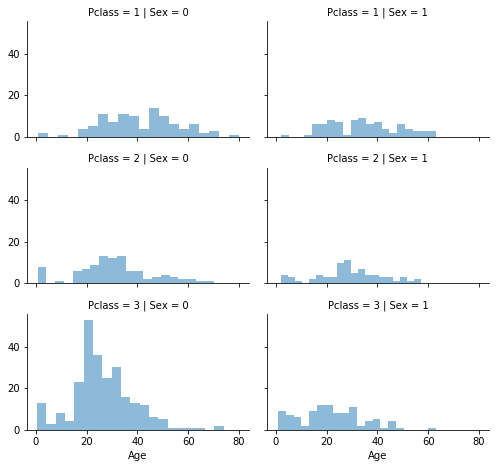

In [373]:
g = sns.FacetGrid(train_df, col = 'Sex', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=20, alpha=0.5)

In [374]:
# row is Sex: 0,1
# column is Pclass: 1,2,3
guess_ages = np.zeros((2,3))
guess_ages   

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [375]:
for dataset in combine:

        for i in range(0,2):
            for j in range(0,3):
                age_guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna().median()
                #Convert float to nearest 0.5 age
                guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5

        for i in range(0,2):
            for j in range(0,3):
                dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j+1),'Age'] = guess_ages[i,j]

        dataset['Age'] = dataset['Age'].astype(int)

In [376]:
sum(test_df['Age'].isnull())

0

In [377]:
train_df['Age'] = train_df['Age'].astype(int)

In [378]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34,0,0,7.8292,Q,5
1,893,3,1,47,1,0,7.0000,S,1
2,894,2,0,62,0,0,9.6875,Q,5
3,895,3,0,27,0,0,8.6625,S,5
4,896,3,1,22,1,1,12.2875,S,1


In [379]:
train_df['Age'].describe()

count    891.000000
mean      29.072952
std       13.326339
min        0.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [380]:
train_df['AgeBand'] =pd.cut(train_df['Age'], 5)

In [381]:
train_df[['AgeBand','Survived']].groupby('AgeBand',as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


In [382]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

train_df.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,5,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,1,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,1,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,5,"(32.0, 48.0]"
5,0,3,0,1,0,0,8.4583,Q,5,"(16.0, 32.0]"
6,0,1,0,3,0,0,51.8625,S,5,"(48.0, 64.0]"
7,0,3,0,0,3,1,21.0750,S,3,"(-0.08, 16.0]"
8,1,3,1,1,0,2,11.1333,S,1,"(16.0, 32.0]"
9,1,2,1,0,1,0,30.0708,C,1,"(-0.08, 16.0]"


In [383]:
train_df['Age'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [384]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,5
1,1,1,1,2,1,0,71.2833,C,1
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,1
4,0,3,0,2,0,0,8.0500,S,5


## Combining exisiting features to create new ones

In [385]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df.head()

train_df[['Family','Survived']].groupby('Family', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [386]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family'] == 1, 'IsAlone'] = 1

train_df[['IsAlone','Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by='Survived',ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [387]:
train_df = train_df.drop(['Parch','SibSp','Family'], axis=1)
test_df = test_df.drop(['Parch','SibSp','Family'], axis=1)
combine = [train_df, test_df]

In [388]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,5,0
1,1,1,1,2,71.2833,C,1,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,1,0
4,0,3,0,2,8.0500,S,5,1


## Completing and banding Fare

In [389]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [390]:
test_df['Fare'].isnull().sum()

0

In [391]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='Survived', ascending = False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [392]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] <= 14.454) & (dataset['Fare'] > 7.91), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] <= 31) & (dataset['Fare'] > 14.454), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [393]:
train_df.drop('FareBand', axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,S,5,0
1,1,1,1,2,3,C,1,0
2,1,3,1,1,1,S,2,1
3,1,1,1,2,3,S,1,0
4,0,3,0,2,1,S,5,1


In [394]:
combine = [train_df, test_df]

## Create artificial feature

In [395]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [396]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,S,5,0,3
1,1,1,1,2,3,C,1,0,2
2,1,3,1,1,1,S,2,1,3
3,1,1,1,2,3,S,1,0,2
4,0,3,0,2,1,S,5,1,6


In [397]:
train_df['Embarked'].isnull().sum()

2

In [398]:
freq_port = train_df['Embarked'].dropna().mode()[0]
freq_port

'S'

In [399]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [400]:
train_df[['Embarked','Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [401]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'C': 1, 'Q':2, 'S':3}).astype(int)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,5,1,6
1,893,3,1,2,0,3,1,0,6
2,894,2,0,3,1,2,5,1,6
3,895,3,0,1,1,3,5,1,3
4,896,3,1,1,1,3,1,0,3


In [402]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,3,5,0,3
1,1,1,1,2,3,1,1,0,2
2,1,3,1,1,1,3,2,1,3
3,1,1,1,2,3,3,1,0,2
4,0,3,0,2,1,3,5,1,6


## Model and Predict

In [403]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [404]:
from xgboost import XGBClassifier

In [405]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [406]:
y_pred = xgb_model.predict(X_test)

In [407]:
output = pd.DataFrame(test_df['PassengerId'].copy())
output['Survived'] = y_pred
output.to_csv('submissions11.csv', sep=',', index=False)

In [408]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [409]:
from sklearn.model_selection import train_test_split
X_tr, X_v, y_tr, y_v = train_test_split(X_train,y_train, test_size=0.2, random_state=123)

In [410]:
X_train.shape, y_train.shape, X_tr.shape, y_tr.shape, X_v.shape, y_v.shape

((891, 8), (891,), (712, 8), (712,), (179, 8), (179,))

In [411]:
xgb_simple = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb_simple.fit(X_tr, y_tr, early_stopping_rounds=5, eval_set=[(X_v,y_v)])

[0]	validation_0-error:0.173184
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.173184
[2]	validation_0-error:0.173184
[3]	validation_0-error:0.173184
[4]	validation_0-error:0.173184
[5]	validation_0-error:0.173184
Stopping. Best iteration:
[0]	validation_0-error:0.173184



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## XGB Parameter tuning

In [412]:
predictors = X_train.columns.values

In [413]:
xgb1 = XGBClassifier(learning_rate=0.1, #default=0.3 Select between 0.01 and 0.2 #makes model more robust by shrinking weights
                     n_estimators=1000,
                     max_depth=5, #default=6 Typically between 3-10. higher values cause overfitting.
                     min_child_weight=1, #default=1 higher values prevent overfitting. Set using CV
                     gamma=0, #default=0. Can choose 0.1 or 0.2. minimum loss reduction required to make a split. Set using CV.
                     subsample=0.8, #default=1 Typically between 0.5-1. Lower values prevent overfitting. Tune using CV.
                     colsample_bytree=0.8,#default=1 Typically between 0.5-1. fraction of cols to be randomly sampled for each tree
                     objective= 'binary:logistic', 
                     #nthread=4,-- not specifying selects max or all available cres/threads
                     scale_pos_weight=1, #default=1 value greater than 0 helps in case of class imbalance for faster convergence.
                     #reg_lambda = 1, default=1 L2 regularization for reducing overfitting
                     #reg_alpha = 0, L1 regularization term used in case of very high dimensionality
                     seed=27)

In [414]:
xgb_params = xgb1.get_xgb_params()
xgb_params

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1000,
 'nthread': 1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': 1,
 'subsample': 0.8}

In [415]:
xgtrain = xgb.DMatrix(X_train.values, label= y_train.values)

In [416]:
#Perform cross validation
cv_folds=5
early_stopping_rounds=50
cvresult = xgb.cv(xgb_params, 
                  xgtrain, 
                  num_boost_round=xgb1.get_params()['n_estimators'], 
                  nfold=cv_folds,
                  metrics='auc',
                  early_stopping_rounds = early_stopping_rounds)
cvresult

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.844365,0.029331,0.861088,0.007389
1,0.857014,0.021151,0.873864,0.008423
2,0.859706,0.023632,0.878539,0.007648
3,0.857027,0.022028,0.882363,0.006231
4,0.860138,0.025833,0.884696,0.005388
5,0.863840,0.024732,0.886721,0.004620
6,0.864100,0.025294,0.889395,0.004250
7,0.865732,0.021431,0.890873,0.004397
8,0.863289,0.021764,0.891638,0.004695
9,0.864704,0.022473,0.891919,0.004533


In [417]:
cvresult.shape[0] #n_estimators

36

In [418]:
xgb1.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=36,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [419]:
#Fit model on the data
xgb1.fit(X_train, y_train, eval_metric='auc')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=36,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [420]:
#Predict training set
y_preds_train = xgb1.predict(X_train)
y_predprob_train = xgb1.predict_proba(X_train)[:,1] 
#probabilites of each class ordered by class label. So first column is label 0 and 2nd is label 1

In [421]:
#Print model report
print("\nModel Report")
print("Accuracy: %.4g" % metrics.accuracy_score(y_train, y_preds_train))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_predprob_train))


Model Report
Accuracy: 0.844
AUC Score (Train): 0.904236


In [422]:
# Plot the feature important
    
#feat_imp = pd.Series(xgb1.booster().get_fscore()).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Feature Importances')
#plt.ylabel('Feature Importance Score')

# Throws an error as booster 'str' is not callable. Need to check

In [435]:
# put all the above steps into one function

def modelfit(alg, X_train, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train,eval_metric='auc')
        
    #Predict training set:
    y_preds_train = xgb1.predict(X_train)
    y_predprob_train = xgb1.predict_proba(X_train)[:,1] 
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_preds_train))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_predprob_train))
    
    #The below is throwing an error. Needs a fix
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [437]:
modelfit(xgb1, X_train, y_train)

[0]	train-auc:0.861088+0.00738922	test-auc:0.844365+0.029331
[1]	train-auc:0.873864+0.00842277	test-auc:0.857014+0.0211506
[2]	train-auc:0.878539+0.00764763	test-auc:0.859706+0.0236324
[3]	train-auc:0.882363+0.00623099	test-auc:0.857027+0.0220276
[4]	train-auc:0.884696+0.00538788	test-auc:0.860138+0.0258327
[5]	train-auc:0.886721+0.00462001	test-auc:0.86384+0.0247324
[6]	train-auc:0.889395+0.00424986	test-auc:0.8641+0.0252937
[7]	train-auc:0.890873+0.00439701	test-auc:0.865732+0.0214314
[8]	train-auc:0.891638+0.0046949	test-auc:0.863289+0.0217637
[9]	train-auc:0.891919+0.00453339	test-auc:0.864704+0.0224729
[10]	train-auc:0.892564+0.00442968	test-auc:0.864587+0.0219698
[11]	train-auc:0.894292+0.00506722	test-auc:0.866969+0.0196878
[12]	train-auc:0.895166+0.00418296	test-auc:0.867329+0.0203454
[13]	train-auc:0.895979+0.00409018	test-auc:0.868099+0.0198938
[14]	train-auc:0.896537+0.00480066	test-auc:0.868238+0.0209055
[15]	train-auc:0.898056+0.00428081	test-auc:0.867529+0.0204058
[16]	tr

In [438]:
xgb1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=36,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [439]:
# Tune max_depth and min_child weight

param_test1 = {
    'max_depth': [x for x in range(3,10,2)],
    'min_child_weight': [x for x in range(1,6,2)]
}

gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=36,
                                                max_depth=5,
                                                min_child_weight=1,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                ),
                        param_grid = param_test1,
                        scoring = 'roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=36,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [425]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.87034, std: 0.02206, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.87079, std: 0.02279, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.86875, std: 0.02444, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.87285, std: 0.02726, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.87353, std: 0.02458, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.87122, std: 0.02455, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.87050, std: 0.02701, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.87383, std: 0.02526, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.87192, std: 0.02456, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.87090, std: 0.02736, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.87369, std: 0.02459, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.87192, std: 0.02456, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 7, 'min_child_weight': 3

In [440]:
# Fine Tune max_depth and min_child weight

param_test2 = {
    'max_depth': [6,7,8],
    'min_child_weight': [2,3,4]
}

gsearch2 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=36,
                                                max_depth=5,
                                                min_child_weight=1,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                ),
                        param_grid = param_test2,
                        scoring = 'roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.87110, std: 0.02644, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: 0.87200, std: 0.02627, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.87157, std: 0.02471, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.87221, std: 0.02508, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: 0.87383, std: 0.02526, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.87271, std: 0.02468, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: 0.87237, std: 0.02587, params: {'max_depth': 8, 'min_child_weight': 2},
  mean: 0.87369, std: 0.02459, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: 0.87282, std: 0.02456, params: {'max_depth': 8, 'min_child_weight': 4}],
 {'max_depth': 7, 'min_child_weight': 3},
 0.8738278968620483)

In [441]:
# Tune gamma

param_test3 = {
    'gamma': [x/10.0 for x in range(0,5)]
    }

gsearch3 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=36,
                                                max_depth=7,
                                                min_child_weight=3,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                ),
                        param_grid = param_test3,
                        scoring = 'roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch3.fit(X_train, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.87383, std: 0.02526, params: {'gamma': 0.0},
  mean: 0.87334, std: 0.02524, params: {'gamma': 0.1},
  mean: 0.87384, std: 0.02418, params: {'gamma': 0.2},
  mean: 0.87263, std: 0.02533, params: {'gamma': 0.3},
  mean: 0.87234, std: 0.02531, params: {'gamma': 0.4}],
 {'gamma': 0.2},
 0.8738435535580589)

In [442]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=3,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=3, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)

In [431]:
modelfit(xgb2, X_train, y_train)

[0]	train-auc:0.857306+0.0069616	test-auc:0.841221+0.0272813
[1]	train-auc:0.871443+0.00869003	test-auc:0.855665+0.0245703
[2]	train-auc:0.875494+0.00741842	test-auc:0.860532+0.0246793
[3]	train-auc:0.877167+0.00596665	test-auc:0.858339+0.0247003
[4]	train-auc:0.878856+0.00557071	test-auc:0.860636+0.0266317
[5]	train-auc:0.879691+0.00570162	test-auc:0.860998+0.0246601
[6]	train-auc:0.882863+0.00598436	test-auc:0.862555+0.0251351
[7]	train-auc:0.883266+0.00566007	test-auc:0.862993+0.0247399
[8]	train-auc:0.884771+0.00579691	test-auc:0.862788+0.0214874
[9]	train-auc:0.885117+0.00526833	test-auc:0.864184+0.0214556
[10]	train-auc:0.88597+0.00473649	test-auc:0.864831+0.0215616
[11]	train-auc:0.886628+0.00514015	test-auc:0.866736+0.0199809
[12]	train-auc:0.888042+0.00503296	test-auc:0.865859+0.0188727
[13]	train-auc:0.888687+0.00426467	test-auc:0.868001+0.0180436
[14]	train-auc:0.889626+0.00491936	test-auc:0.867917+0.0194508
[15]	train-auc:0.890993+0.00476379	test-auc:0.869711+0.0204629
[16]

In [443]:
xgb2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=3, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)

In [444]:
# Tune subsample and colsample_bytree

param_test4 = {
    'subsample': [x/10.0 for x in range(6,10)],
    'colsample_bytree': [x/10.0 for x in range(6,10)]
}

gsearch4 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=88,
                                                max_depth=7,
                                                min_child_weight=3,
                                                gamma=0.2,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                ),
                        param_grid = param_test4,
                        scoring = 'roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch4.fit(X_train, y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.87019, std: 0.02724, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.87127, std: 0.02835, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.87173, std: 0.02672, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.87202, std: 0.02721, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.87180, std: 0.02760, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.87293, std: 0.02631, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.87380, std: 0.02494, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.87167, std: 0.02636, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.87195, std: 0.02602, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.87183, std: 0.02608, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.87362, std: 0.02549, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.87003, std: 0.02732, params: {'colsample_bytree': 0.8, 'subsample'

In [457]:
# Fine Tune subsample and colsample_bytree

param_test5 = {
    'subsample': [x/100.0 for x in range(50,70,5)],
    'colsample_bytree': [x/100.0 for x in range(80,100,5)]
}

gsearch5 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=88,
                                                max_depth=7,
                                                min_child_weight=3,
                                                gamma=0.2,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=1,
                                                scale_pos_weight=1,
                                                seed=27,
                                                ),
                        param_grid = param_test5,
                        scoring = 'roc_auc',
                        n_jobs=1,
                        iid=False,
                        cv=5)

gsearch5.fit(X_train, y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.87189, std: 0.02819, params: {'colsample_bytree': 0.8, 'subsample': 0.5},
  mean: 0.87178, std: 0.02404, params: {'colsample_bytree': 0.8, 'subsample': 0.55},
  mean: 0.87195, std: 0.02602, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.87263, std: 0.02566, params: {'colsample_bytree': 0.8, 'subsample': 0.65},
  mean: 0.87189, std: 0.02819, params: {'colsample_bytree': 0.85, 'subsample': 0.5},
  mean: 0.87178, std: 0.02404, params: {'colsample_bytree': 0.85, 'subsample': 0.55},
  mean: 0.87195, std: 0.02602, params: {'colsample_bytree': 0.85, 'subsample': 0.6},
  mean: 0.87263, std: 0.02566, params: {'colsample_bytree': 0.85, 'subsample': 0.65},
  mean: 0.86916, std: 0.03020, params: {'colsample_bytree': 0.9, 'subsample': 0.5},
  mean: 0.87059, std: 0.02679, params: {'colsample_bytree': 0.9, 'subsample': 0.55},
  mean: 0.87404, std: 0.02608, params: {'colsample_bytree': 0.9, 'subsample': 0.6},
  mean: 0.87267, std: 0.02719, params: {'colsample_bytree': 0.9, 's

In [458]:
# Tune reg_lambda and reg_alpha

param_test6 = {
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100],
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=88,
                                                max_depth=7,
                                                min_child_weight=3,
                                                gamma=0.2,
                                                subsample=0.6,
                                                colsample_bytree=0.9,
                                                objective='binary:logistic',
                                                nthread=1,
                                                scale_pos_weight=1,
                                                seed=27,
                                                ),
                        param_grid = param_test6,
                        scoring = 'roc_auc',
                        n_jobs=1,
                        iid=False,
                        cv=5)

gsearch6.fit(X_train, y_train)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.87071, std: 0.02829, params: {'reg_alpha': 1e-05, 'reg_lambda': 1e-05},
  mean: 0.87068, std: 0.02838, params: {'reg_alpha': 1e-05, 'reg_lambda': 0.01},
  mean: 0.87186, std: 0.02940, params: {'reg_alpha': 1e-05, 'reg_lambda': 0.1},
  mean: 0.87404, std: 0.02608, params: {'reg_alpha': 1e-05, 'reg_lambda': 1},
  mean: 0.86434, std: 0.01546, params: {'reg_alpha': 1e-05, 'reg_lambda': 100},
  mean: 0.87335, std: 0.02830, params: {'reg_alpha': 0.01, 'reg_lambda': 1e-05},
  mean: 0.87106, std: 0.02792, params: {'reg_alpha': 0.01, 'reg_lambda': 0.01},
  mean: 0.87270, std: 0.02800, params: {'reg_alpha': 0.01, 'reg_lambda': 0.1},
  mean: 0.87227, std: 0.02716, params: {'reg_alpha': 0.01, 'reg_lambda': 1},
  mean: 0.86436, std: 0.01546, params: {'reg_alpha': 0.01, 'reg_lambda': 100},
  mean: 0.87167, std: 0.02892, params: {'reg_alpha': 0.1, 'reg_lambda': 1e-05},
  mean: 0.87174, std: 0.02747, params: {'reg_alpha': 0.1, 'reg_lambda': 0.01},
  mean: 0.87109, std: 0.02872, params: {'reg

In [466]:
# Fine Tune reg_lambda and reg_alpha

param_test7 = {
    'reg_lambda': [0.8,0.9,1,1.1,1.2],
    'reg_alpha': [0, 1e-30,1e-20, 1e-10, 1e-7]
}

gsearch7 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=88,
                                                max_depth=7,
                                                min_child_weight=3,
                                                gamma=0.2,
                                                subsample=0.6,
                                                colsample_bytree=0.9,
                                                objective='binary:logistic',
                                                nthread=1,
                                                scale_pos_weight=1,
                                                seed=27,
                                                ),
                        param_grid = param_test7,
                        scoring = 'roc_auc',
                        n_jobs=1,
                        iid=False,
                        cv=5)

gsearch7.fit(X_train, y_train)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.87188, std: 0.02791, params: {'reg_alpha': 0, 'reg_lambda': 0.8},
  mean: 0.87204, std: 0.02815, params: {'reg_alpha': 0, 'reg_lambda': 0.9},
  mean: 0.87404, std: 0.02608, params: {'reg_alpha': 0, 'reg_lambda': 1},
  mean: 0.87233, std: 0.02776, params: {'reg_alpha': 0, 'reg_lambda': 1.1},
  mean: 0.87078, std: 0.02744, params: {'reg_alpha': 0, 'reg_lambda': 1.2},
  mean: 0.87188, std: 0.02791, params: {'reg_alpha': 1e-30, 'reg_lambda': 0.8},
  mean: 0.87204, std: 0.02815, params: {'reg_alpha': 1e-30, 'reg_lambda': 0.9},
  mean: 0.87404, std: 0.02608, params: {'reg_alpha': 1e-30, 'reg_lambda': 1},
  mean: 0.87233, std: 0.02776, params: {'reg_alpha': 1e-30, 'reg_lambda': 1.1},
  mean: 0.87078, std: 0.02744, params: {'reg_alpha': 1e-30, 'reg_lambda': 1.2},
  mean: 0.87188, std: 0.02791, params: {'reg_alpha': 1e-20, 'reg_lambda': 0.8},
  mean: 0.87204, std: 0.02815, params: {'reg_alpha': 1e-20, 'reg_lambda': 0.9},
  mean: 0.87404, std: 0.02608, params: {'reg_alpha': 1e-20, 'reg

In [467]:
# Default parameters of regularization work fine.

In [469]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=3,
 gamma=0.2,
 subsample=0.6,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
xgb3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=3, missing=None,
       n_estimators=1000, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.6)

In [470]:
modelfit(xgb3, X_train, y_train)

[0]	train-auc:0.866058+0.00625605	test-auc:0.84936+0.0233924
[1]	train-auc:0.873547+0.00692561	test-auc:0.854374+0.0245564
[2]	train-auc:0.874216+0.00681041	test-auc:0.856015+0.0262164
[3]	train-auc:0.875742+0.00837025	test-auc:0.85623+0.0265941
[4]	train-auc:0.876216+0.00836391	test-auc:0.857963+0.025517
[5]	train-auc:0.878361+0.00631008	test-auc:0.858218+0.0257158
[6]	train-auc:0.881934+0.00472821	test-auc:0.858554+0.0255132
[7]	train-auc:0.883601+0.00418801	test-auc:0.861168+0.0266836
[8]	train-auc:0.885316+0.0035871	test-auc:0.863703+0.0263342
[9]	train-auc:0.885657+0.00359677	test-auc:0.86222+0.0257704
[10]	train-auc:0.886377+0.00405735	test-auc:0.863887+0.0260223
[11]	train-auc:0.887372+0.00432923	test-auc:0.865223+0.0238947
[12]	train-auc:0.887565+0.00453543	test-auc:0.864103+0.022381
[13]	train-auc:0.889118+0.00352545	test-auc:0.867133+0.0209538
[14]	train-auc:0.889294+0.00458255	test-auc:0.868728+0.0199956
[15]	train-auc:0.890615+0.00476587	test-auc:0.870347+0.0204328
[16]	tra

In [472]:
# Reduce learning rate

xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=7,
 min_child_weight=3,
 gamma=0.2,
 subsample=0.6,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
xgb4


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.2, learning_rate=0.01,
       max_delta_step=0, max_depth=7, min_child_weight=3, missing=None,
       n_estimators=5000, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.6)

In [473]:
modelfit(xgb4, X_train, y_train)

[0]	train-auc:0.866058+0.00625605	test-auc:0.84936+0.0233924
[1]	train-auc:0.872245+0.00585172	test-auc:0.8521+0.0250943
[2]	train-auc:0.873119+0.00589806	test-auc:0.853869+0.0256876
[3]	train-auc:0.873967+0.00667409	test-auc:0.854653+0.0265714
[4]	train-auc:0.874586+0.00773095	test-auc:0.857+0.0253829
[5]	train-auc:0.87748+0.00591095	test-auc:0.856807+0.0261848
[6]	train-auc:0.878519+0.00616045	test-auc:0.857354+0.026169
[7]	train-auc:0.878685+0.00602538	test-auc:0.857294+0.0264742
[8]	train-auc:0.878329+0.00613549	test-auc:0.857414+0.0265791
[9]	train-auc:0.878207+0.00589912	test-auc:0.857849+0.0264294
[10]	train-auc:0.877146+0.00616311	test-auc:0.857527+0.026213
[11]	train-auc:0.877135+0.00618814	test-auc:0.858148+0.0253828
[12]	train-auc:0.87737+0.00625603	test-auc:0.858438+0.0241305
[13]	train-auc:0.879193+0.00431669	test-auc:0.859726+0.0255395
[14]	train-auc:0.879194+0.00455556	test-auc:0.859967+0.0260753
[15]	train-auc:0.879623+0.00436995	test-auc:0.861362+0.0268667
[16]	train-a

[131]	train-auc:0.89046+0.00436561	test-auc:0.869844+0.019012
[132]	train-auc:0.890338+0.00430028	test-auc:0.86944+0.0182519
[133]	train-auc:0.890508+0.00456842	test-auc:0.86955+0.018048
[134]	train-auc:0.89042+0.00441926	test-auc:0.869653+0.0179135
[135]	train-auc:0.890392+0.00432306	test-auc:0.869853+0.0177872
[136]	train-auc:0.890505+0.00445149	test-auc:0.870021+0.0178147
[137]	train-auc:0.890619+0.0043457	test-auc:0.870172+0.0178883
[138]	train-auc:0.890651+0.00440427	test-auc:0.870171+0.0179188
[139]	train-auc:0.89063+0.00436551	test-auc:0.870372+0.0175874
[140]	train-auc:0.890794+0.00436663	test-auc:0.870403+0.0178108
[141]	train-auc:0.890755+0.00433151	test-auc:0.870298+0.0180297
[142]	train-auc:0.890923+0.00429663	test-auc:0.87076+0.018496
[143]	train-auc:0.89082+0.00429059	test-auc:0.870887+0.018632
[144]	train-auc:0.890896+0.00425994	test-auc:0.871112+0.0188626
[145]	train-auc:0.890875+0.00434327	test-auc:0.871034+0.0187616
[146]	train-auc:0.891029+0.00446397	test-auc:0.87105

In [474]:
y_pred = xgb3.predict(X_test)
output = pd.DataFrame(test_df['PassengerId'].copy())
output['Survived'] = y_pred
output.to_csv('submissions12.csv', sep=',', index=False)